## Final Project Submission

Please fill out:
* Student name: Xinjia (Carrie) Liu
* Student pace: self paced
* Scheduled project review date/time: June 23, 2021 / 2PM EST
* Instructor name: Jeff Herman
* Blog post URL: https://carlearn.github.io/movie_industry_analysis


## Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/Users/carrie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Get Movie Data via TMDb API

Note: The next step EDA is based on the csv file exported on June 14, 2021. 

### Get more Data from IMDb datasets

In [2]:
df_imdb_name = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
print(df_imdb_name.shape)
df_imdb_name.head(2)

(606648, 6)


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


In [3]:
df_imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
print(df_imdb_title_basics.shape)
df_imdb_title_basics.head(2)

(146144, 6)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [4]:
df_imdb_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
print(df_imdb_crew.shape)
df_imdb_crew.head(2)

(146144, 3)


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"


In [5]:
df_imdb_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
print(df_imdb_principals.shape)
df_imdb_principals.head(2)

(1028186, 6)


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN


In [6]:
df_imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
print(df_imdb_ratings.shape)
df_imdb_ratings.head(2)

(73856, 3)


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [7]:
from functools import reduce
dfs = [df_imdb_title_basics, df_imdb_crew, df_imdb_ratings, df_imdb_principals]
df_tconst = reduce(lambda left,right: pd.merge(left,right,on='tconst'), dfs)

In [8]:
df_imdb = pd.merge(df_tconst, df_imdb_name, on='nconst')

In [9]:
df_imdb

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",7.0,77,10,nm0006210,composer,NaN,NaN,Naushad,1919.0,2006.0,"composer,soundtrack,music_department","tt0054910,tt0266765,tt0044392,tt0053999"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",7.0,77,1,nm0474801,actor,NaN,"[""Kundan S. Prasad"",""Bajrangi""]",Dilip Kumar,1922.0,NaN,"actor,writer,director","tt0058287,tt0054910,tt0047990,tt0084667"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",7.0,77,2,nm0904537,actress,NaN,"[""Munni"",""Laila-E-Aasmaan""]",Vyjayanthimala,1933.0,NaN,"actress,music_department,miscellaneous","tt0047990,tt0054910,tt0050665,tt0058547"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",7.0,77,3,nm0756379,actor,NaN,"[""Ganeshi N. Prasad""]",Balraj Sahni,1913.0,1973.0,"actor,writer,director","tt0055039,tt0043307,tt0234827,tt0233326"
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",7.0,77,4,nm0474876,actor,NaN,"[""Dwarka N. Prasad""]",Sanjeev Kumar,1938.0,1985.0,actor,"tt0148841,tt0215517,tt0073707,tt0178186"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629593,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,nm1716653,"nm3678448,nm9361716",6.6,5,3,nm7817936,actor,NaN,NaN,Pau Escobar,NaN,NaN,actor,"tt8176280,tt4857878,tt1986825,tt8178754"
629594,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,nm1716653,"nm3678448,nm9361716",6.6,5,5,nm1716653,director,NaN,NaN,Laura Jou,NaN,NaN,"miscellaneous,actress,director","tt1164999,tt0464141,tt5151924,tt1649419"
629595,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,nm5684093,NaN,6.5,11,1,nm6460816,self,NaN,"[""Himself""]",Nils Leidal,NaN,NaN,NaN,tt3698384
629596,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,nm5684093,NaN,6.5,11,2,nm5684093,director,NaN,NaN,Joost van der Wiel,NaN,NaN,"director,cinematographer,writer","tt2927550,tt4000564"


## Exploratory Data Analysis

### Extract Transform Load - Clean Data

In [10]:
df_tmdb = pd.read_csv('tmdb_data.csv')

In [11]:
df_tmdb = df_tmdb[(df_tmdb.revenue!=0) & (df_tmdb.budget!=0)]

In [12]:
df_tmdb.shape

(2223, 12)

In [13]:
# Check missing data
df_tmdb[df_tmdb.id.isnull()]

,id,imdb_id,original_title,title,genres,release_date,budget,revenue,popularity,vote_average,vote_count,runtime
3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_tmdb[df_tmdb.imdb_id.isnull()]

,id,imdb_id,original_title,title,genres,release_date,budget,revenue,popularity,vote_average,vote_count,runtime
3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7332,126400.0,NaN,गैंग्स ऑफ़ वास्सेपुर पार्ट - २,Gangs of Wasseypur - Part 2,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",2012-08-08,1670000.0,4900000.0,5.866,8.0,57.0,160.0


In [15]:
df_tmdb.dropna(subset=['imdb_id'], inplace=True)

In [16]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2221 entries, 0 to 9972
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2221 non-null   float64
 1   imdb_id         2221 non-null   object 
 2   original_title  2221 non-null   object 
 3   title           2221 non-null   object 
 4   genres          2221 non-null   object 
 5   release_date    2221 non-null   object 
 6   budget          2221 non-null   float64
 7   revenue         2221 non-null   float64
 8   popularity      2221 non-null   float64
 9   vote_average    2221 non-null   float64
 10  vote_count      2221 non-null   float64
 11  runtime         2221 non-null   float64
dtypes: float64(7), object(5)
memory usage: 225.6+ KB


In [17]:
# Check any duplicates
df_tmdb.id.duplicated().any(), df_tmdb.imdb_id.duplicated().any()

(False, False)

In [18]:
# Convert dtypes
df_tmdb.release_date = pd.to_datetime(df_tmdb.release_date)
df_tmdb.id = df_tmdb.id.astype(int)
df_tmdb.vote_count = df_tmdb.vote_count.astype(int)
df_tmdb.runtime = df_tmdb.runtime.astype(int)
df_tmdb.genres = df_tmdb.genres.apply(lambda x: eval(x))

In [19]:
def split_genres(data):
    '''split the genres column in the raw data to get the specific category of movie genres.'''
    genres_name = []
    for i in range(0, len(data)):
        genres_name.append(data[i]['name'])
    return genres_name

In [20]:
df_tmdb.genres = df_tmdb.genres.apply(split_genres)

In [21]:
genres = set()
for item in df_tmdb.genres:
    for genre in item:
        genres.add(genre)
genres = list(genres)
print(f'There are total {len(genres)} genres in the dataset. They are {", " .join(genres)}.')

There are total 19 genres in the dataset. They are Action, Animation, Science Fiction, Fantasy, Mystery, Romance, History, Western, Family, Crime, War, TV Movie, Drama, Thriller, Documentary, Adventure, Music, Horror, Comedy.


In [22]:
# Convert the money value to millions
df_tmdb['budget($mil)'] = (df_tmdb.budget.astype(float)/1000000).round(2)
df_tmdb['revenue($mil)'] = (df_tmdb.revenue.astype(float)/1000000).round(2)

In [23]:
df_tmdb['profit($mil)'] = df_tmdb['revenue($mil)'] - df_tmdb['budget($mil)']

In [24]:
df_tmdb = df_tmdb.sort_values(by=['profit($mil)'], ascending=False)

In [25]:
df_tmdb.head()

,id,imdb_id,original_title,title,genres,release_date,budget,revenue,popularity,vote_average,vote_count,runtime,budget($mil),revenue($mil),profit($mil)
6,299534,tt4154796,Avengers: Endgame,Avengers: Endgame,"[Adventure, Science Fiction, Action]",2019-04-24,356000000.0,2.797801e+09,212.225,8.3,18313,181,356.0,2797.80,2441.80
381,140607,tt2488496,Star Wars: The Force Awakens,Star Wars: The Force Awakens,"[Action, Adventure, Science Fiction, Fantasy]",2015-12-15,245000000.0,2.068224e+09,45.699,7.3,15857,136,245.0,2068.22,1823.22
11,299536,tt4154756,Avengers: Infinity War,Avengers: Infinity War,"[Adventure, Action, Science Fiction]",2018-04-25,300000000.0,2.046240e+09,255.240,8.3,21969,149,300.0,2046.24,1746.24
133,135397,tt0369610,Jurassic World,Jurassic World,"[Action, Adventure, Science Fiction, Thriller]",2015-06-06,150000000.0,1.671713e+09,80.498,6.7,16878,124,150.0,1671.71,1521.71
84,420818,tt6105098,The Lion King,The Lion King,"[Family, Adventure, Animation]",2019-07-12,260000000.0,1.656943e+09,90.068,7.2,7733,118,260.0,1656.94,1396.94


In [26]:
df_tmdb = df_tmdb.reset_index()
df_tmdb = df_tmdb.drop(['index', 'budget','revenue'],axis=1)

In [27]:
print(df_tmdb.shape)
df_tmdb.head()

(2221, 13)


,id,imdb_id,original_title,title,genres,release_date,popularity,vote_average,vote_count,runtime,budget($mil),revenue($mil),profit($mil)
0,299534,tt4154796,Avengers: Endgame,Avengers: Endgame,"[Adventure, Science Fiction, Action]",2019-04-24,212.225,8.3,18313,181,356.0,2797.80,2441.80
1,140607,tt2488496,Star Wars: The Force Awakens,Star Wars: The Force Awakens,"[Action, Adventure, Science Fiction, Fantasy]",2015-12-15,45.699,7.3,15857,136,245.0,2068.22,1823.22
2,299536,tt4154756,Avengers: Infinity War,Avengers: Infinity War,"[Adventure, Action, Science Fiction]",2018-04-25,255.240,8.3,21969,149,300.0,2046.24,1746.24
3,135397,tt0369610,Jurassic World,Jurassic World,"[Action, Adventure, Science Fiction, Thriller]",2015-06-06,80.498,6.7,16878,124,150.0,1671.71,1521.71
4,420818,tt6105098,The Lion King,The Lion King,"[Family, Adventure, Animation]",2019-07-12,90.068,7.2,7733,118,260.0,1656.94,1396.94


### Problem Solving

After eyeballing the raw data, I want to further explore the data to solve the following questions.

For the years between 2010 and 2019 (i.e. the decade pre-pandemic)

1. What genre of films makes the most profit?
2. What genre of films is the most popular?
3. When shall our studio release the film in the theater?
4. Who are the top 5 directors and actors our studio should hire?

#### 1. What genre of films makes the most profit?

In [28]:
genres_list = df_tmdb['genres'].apply(pd.Series).stack()
genres_list.index = genres_list.index.droplevel(-1)
genres_list.name = 'genres'
del df_tmdb['genres']
df_tmdb = df_tmdb.join(genres_list)

In [29]:
df_tmdb

,id,imdb_id,original_title,title,release_date,popularity,vote_average,vote_count,runtime,budget($mil),revenue($mil),profit($mil),genres
0,299534,tt4154796,Avengers: Endgame,Avengers: Endgame,2019-04-24,212.225,8.3,18313,181,356.0,2797.80,2441.80,Adventure
0,299534,tt4154796,Avengers: Endgame,Avengers: Endgame,2019-04-24,212.225,8.3,18313,181,356.0,2797.80,2441.80,Science Fiction
0,299534,tt4154796,Avengers: Endgame,Avengers: Endgame,2019-04-24,212.225,8.3,18313,181,356.0,2797.80,2441.80,Action
1,140607,tt2488496,Star Wars: The Force Awakens,Star Wars: The Force Awakens,2015-12-15,45.699,7.3,15857,136,245.0,2068.22,1823.22,Action
1,140607,tt2488496,Star Wars: The Force Awakens,Star Wars: The Force Awakens,2015-12-15,45.699,7.3,15857,136,245.0,2068.22,1823.22,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,398978,tt1302006,The Irishman,The Irishman,2019-11-01,24.258,7.6,4715,209,159.0,8.00,-151.00,Drama
2219,398978,tt1302006,The Irishman,The Irishman,2019-11-01,24.258,7.6,4715,209,159.0,8.00,-151.00,History
2220,57201,tt1210819,The Lone Ranger,The Lone Ranger,2013-07-03,24.113,6.0,4750,149,255.0,89.29,-165.71,Action
2220,57201,tt1210819,The Lone Ranger,The Lone Ranger,2013-07-03,24.113,6.0,4750,149,255.0,89.29,-165.71,Adventure


In [30]:
s1=df_tmdb.groupby('genres')['profit($mil)'].mean()
s2=df_tmdb.groupby('genres')['profit($mil)'].sum()
df_1 = pd.concat([s1,s2],axis=1)

In [31]:
df_1.columns = ['avg_profit','total_profit']
df_1

,avg_profit,total_profit
genres,,
Action,142.399669,90423.79
Adventure,234.959351,97743.09
Animation,205.103054,34252.21
Comedy,81.262805,60540.79
Crime,48.237249,14905.31
Documentary,13.651818,300.34
Drama,44.642723,47544.50
Family,187.559035,42763.46
Fantasy,187.080830,45086.48


In [32]:
plt.style.use('ggplot')

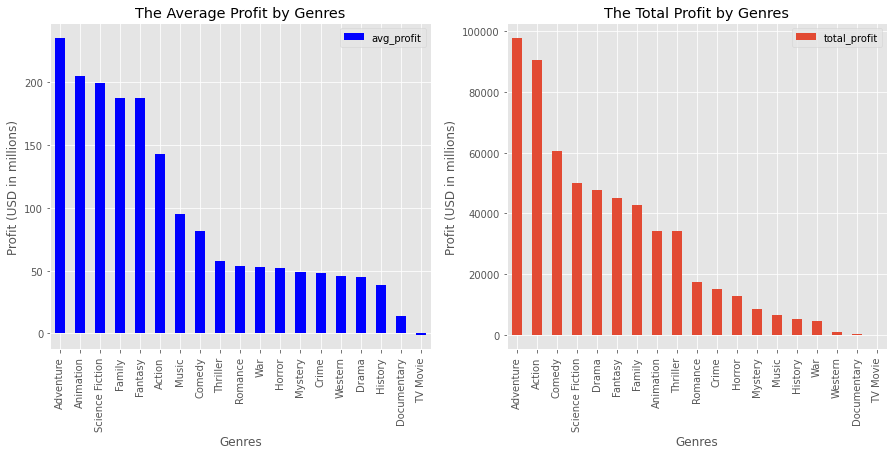

In [33]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

df_1.sort_values(by='avg_profit', ascending=False).plot(y='avg_profit', kind='bar', ax=ax1, color='blue')
ax1.set_title('The Average Profit by Genres')
ax1.set_xlabel('Genres')
ax1.set_ylabel('Profit (USD in millions)')

df_1.sort_values(by='total_profit', ascending=False).plot(y='total_profit', kind='bar', ax=ax2)
ax2.set_title('The Total Profit by Genres')
ax2.set_xlabel('Genres')
ax2.set_ylabel('Profit (USD in millions)');

Findings:
- The top 5 genres of movies have the highest average profits are: Adventure, Animation, Science Fiction, Family and Fantasy.
- The top 5 genres of movies have the highest total profits are: Adventure, Action, Comedy, Science Fiction and Drama.

Question 1 Conclusion:
- Our studio should produce the Adventure movies.

#### 2. What genre of films is the most popular?

Calculate a score to evaluate the popularity for each movie
- We need a metric to score or rate movie
- Calculate the score for every movie
- Sort the scores and recommend the best rated movie to the users.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, we will use a weighted rating (wr) which is given as 

    Weighted Rating (WR) =  (v/(v+m) * R) + (m/(m+v) * C)

where,

v is the number of votes for the movie;
m is the minimum votes required to be listed in the chart;
R is the average rating of the movie; And
C is the mean vote across the whole report.

In [34]:
df_tmdb['vote_average'].describe()

count    5730.000000
mean        6.492461
std         0.793662
min         0.000000
25%         6.000000
50%         6.500000
75%         7.000000
max        10.000000
Name: vote_average, dtype: float64

In [35]:
df_tmdb['vote_count'].describe()

count     5730.000000
mean      2701.706632
std       3688.495435
min          0.000000
25%        386.500000
50%       1242.500000
75%       3408.000000
max      29218.000000
Name: vote_count, dtype: float64

In [36]:
m = df_tmdb['vote_count'].quantile(0.25)
C = df_tmdb['vote_average'].mean()

def weighted_rating(df, m=m, C=C):
    '''we will use a weighted rating (wr) which is given as
    Weighted Rating (WR) =  (v/(v+m) * R) + (m/(m+v) * C)
    where,
    v is the number of votes for the movie; 
    m is the minimum votes required to be listed in the chart; 
    R is the average rating of the movie; 
    And C is the mean vote across the whole report.
    '''
    v = df['vote_count']
    R = df['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [37]:
score_column = df_tmdb.apply(weighted_rating, axis=1)
df_tmdb.insert(11,'score', score_column)

In [38]:
s3=df_tmdb.groupby('genres')['popularity'].mean()
s4=df_tmdb.groupby('genres')['score'].mean()
df_2 = pd.concat([s3,s4],axis=1)

In [39]:
df_2

,popularity,score
genres,,
Action,34.243633,6.468863
Adventure,38.662077,6.568250
Animation,34.549677,6.720449
Comedy,20.722377,6.471286
Crime,23.000324,6.525622
Documentary,7.755045,6.683612
Drama,18.883483,6.697624
Family,29.834189,6.590244
Fantasy,34.299975,6.485549


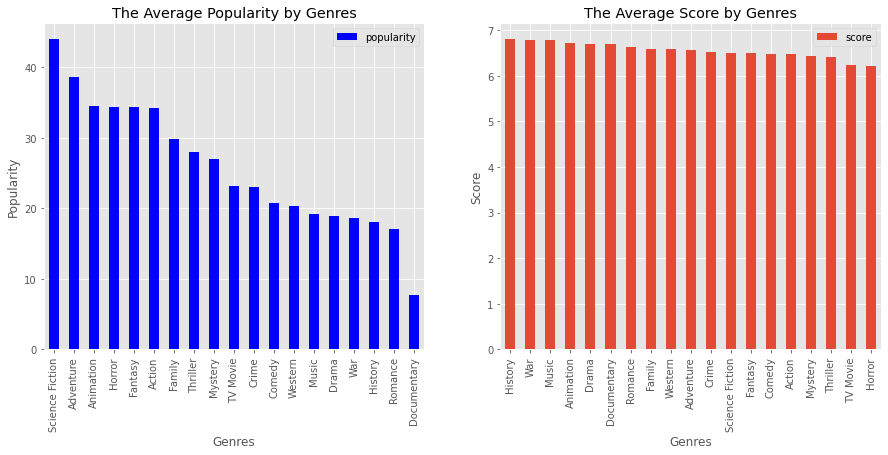

In [40]:
fig = plt.figure(figsize=(15,6))
ax3 = fig.add_subplot(121)
ax4 = fig.add_subplot(122)

df_2.sort_values(by='popularity', ascending=False).plot(y='popularity', kind='bar', ax=ax3, color='blue')
ax3.set_title('The Average Popularity by Genres')
ax3.set_xlabel('Genres')
ax3.set_ylabel('Popularity')

df_2.sort_values(by='score', ascending=False).plot(y='score', kind='bar', ax=ax4)
ax4.set_title('The Average Score by Genres')
ax4.set_xlabel('Genres')
ax4.set_ylabel('Score');

Findings:
- The top 5 genres of movies by the average popularity on TMDb are Science Fiction, Adventure, Animation, Horror and Fantasy.
- The top 5 genres of movies by the average score on TMDb are History, War, Music, Animation and Drama.

Question 2 Conclusion:
- Considering the scores by genres are very close, we will use the popularity on TMDb as the major metric to measure the popularity level among audience. 
- Therefore, our studio should produce the movies in genres of Science Fiction, Adventure and Animation.

#### 3. When shall our studio release the film in the theater?

In [41]:
df_tmdb.head(2)

,id,imdb_id,original_title,title,release_date,popularity,vote_average,vote_count,runtime,budget($mil),revenue($mil),score,profit($mil),genres
0,299534,tt4154796,Avengers: Endgame,Avengers: Endgame,2019-04-24,212.225,8.3,18313,181,356.0,2797.8,8.26264,2441.8,Adventure
0,299534,tt4154796,Avengers: Endgame,Avengers: Endgame,2019-04-24,212.225,8.3,18313,181,356.0,2797.8,8.26264,2441.8,Science Fiction


In [42]:
# Analyze the seasonality of movies
# Add a new column called release_month with only the month from the release_date
month =  [x.strftime('%B') for x in df_tmdb['release_date']]
month_column = month
df_tmdb.insert(5,'release_month', month_column)

In [43]:
s5 = df_tmdb.groupby('release_month')['profit($mil)'].mean()
s6 = df_tmdb.groupby('release_month')['popularity'].mean()

In [44]:
month_index = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

In [45]:
s5 = s5.reindex(index=month_index)
s6 = s6.reindex(index=month_index)
df_3a = pd.concat([s5,s6],axis=1)

In [46]:
df_3a

,profit($mil),popularity
release_month,,
January,52.148850,23.434385
February,81.122217,21.566909
March,93.433889,26.406782
April,131.729102,33.256005
May,122.398597,31.937000
June,191.594555,30.917204
July,112.315130,24.589004
August,54.409134,27.264287
September,41.846457,20.936290


/Users/carrie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/carrie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


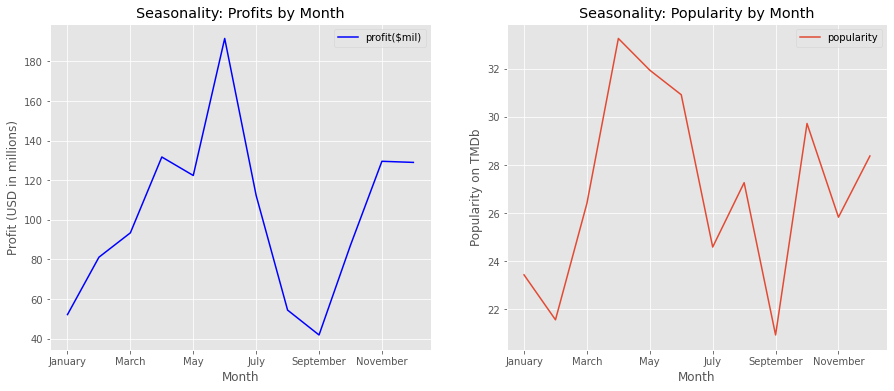

In [47]:
fig = plt.figure(figsize=(15,6))
ax5 = fig.add_subplot(121)
ax6 = fig.add_subplot(122)

df_3a.plot(y='profit($mil)', kind='line', ax=ax5, color='blue')
ax5.set_title('Seasonality: Profits by Month')
ax5.set_xlabel('Month')
ax5.set_ylabel('Profit (USD in millions)')

df_3a.plot(y='popularity', kind='line', ax=ax6)
ax6.set_title('Seasonality: Popularity by Month')
ax6.set_xlabel('Month')
ax6.set_ylabel('Popularity on TMDb');

Findings:
- The patterns of the seasonality of profits and popularity are similar.
- Popularity seasonality is about one month lagging behind profits, because the movie tickets are generally sold before the release dates.
- April, June and November/December are the most profitable months to release movies.
- April, May and June are the most popular months to release movies.

Therefore, in general, regardless of the genres of movies, pre-summer and summer is the best time to release our film. If we miss the summer season, we can release our film in holiday season instead.

In [48]:
df_3b = df_tmdb.groupby('genres')['release_month'].value_counts().unstack()
df_3b

release_month,April,August,December,February,January,July,June,March,May,November,October,September
genres,,,,,,,,,,,,
Action,47.0,66.0,55.0,45.0,62.0,66.0,57.0,46.0,41.0,35.0,51.0,64.0
Adventure,35.0,35.0,45.0,26.0,31.0,35.0,38.0,44.0,32.0,36.0,29.0,30.0
Animation,9.0,10.0,13.0,10.0,11.0,22.0,23.0,19.0,8.0,16.0,15.0,11.0
Comedy,60.0,68.0,68.0,48.0,49.0,60.0,73.0,61.0,60.0,63.0,62.0,73.0
Crime,15.0,31.0,23.0,19.0,29.0,30.0,25.0,25.0,15.0,20.0,34.0,43.0
Documentary,2.0,2.0,NaN,5.0,2.0,2.0,3.0,NaN,NaN,NaN,4.0,2.0
Drama,69.0,78.0,103.0,69.0,65.0,62.0,80.0,67.0,76.0,110.0,120.0,166.0
Family,13.0,19.0,18.0,10.0,14.0,18.0,31.0,30.0,13.0,25.0,21.0,16.0
Fantasy,16.0,15.0,31.0,15.0,18.0,19.0,20.0,26.0,21.0,20.0,23.0,17.0


In [49]:
# Clean the dataframe
# replace NaN by 0 and convert the dtype from float to integer
# reorder the columns by month
df_3b = df_3b.fillna(0).astype(int)
df_3b = df_3b[month_index]

In [50]:
df_3c = df_3b.loc[['Adventure','Animation','Science Fiction']]

In [51]:
df_3d = df_3c.transpose()

In [52]:
df_3d

genres,Adventure,Animation,Science Fiction
release_month,,,
January,31,11,18
February,26,10,14
March,44,19,31
April,35,9,25
May,32,8,19
June,38,23,24
July,35,22,28
August,35,10,18
September,30,11,21


/Users/carrie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/carrie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/carrie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


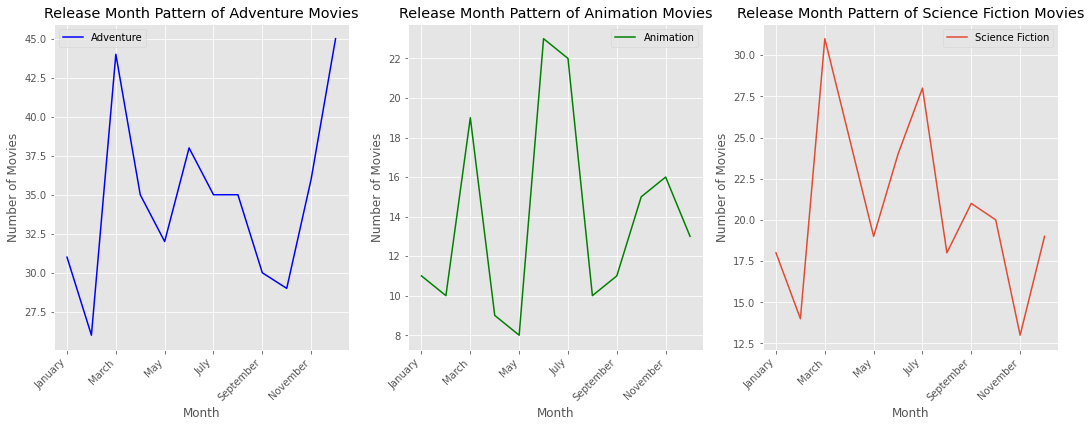

In [53]:
fig = plt.figure(figsize=(18,6))
ax7a = fig.add_subplot(131)
ax8a = fig.add_subplot(132)
ax9a = fig.add_subplot(133)

df_3d.plot(y='Adventure', kind='line', ax=ax7a, color='blue')
ax7a.set_title('Release Month Pattern of Adventure Movies')
ax7a.set_xlabel('Month')
ax7a.set_ylabel('Number of Movies')
ax7a.set_xticklabels(ax7a.get_xticklabels(), rotation=45, ha='right')

df_3d.plot(y='Animation', kind='line', ax=ax8a, color='green')
ax8a.set_title('Release Month Pattern of Animation Movies')
ax8a.set_xlabel('Month')
ax8a.set_ylabel('Number of Movies')
ax8a.set_xticklabels(ax8a.get_xticklabels(), rotation=45, ha='right')

df_3d.plot(y='Science Fiction', kind='line', ax=ax9a)
ax9a.set_title('Release Month Pattern of Science Fiction Movies')
ax9a.set_xlabel('Month')
ax9a.set_ylabel('Number of Movies')
ax9a.set_xticklabels(ax9a.get_xticklabels(), rotation=45, ha='right');

Findings:

According to our previous analysis, our studio shall produce the movies in genres of Adventure, Animation and Science Fiction. Therefore, the months to release most number of movies are:

- Adventure: March, June and December;
- Animation: March, June and July;
- Science Fiction: March, April and July.


In [54]:
df_3e = df_tmdb.groupby(['genres','release_month'])['profit($mil)'].mean().unstack()

In [55]:
# Clean the dataframe
# replace NaN by 0 and convert the dtype from float to integer
# reorder the columns by month
df_3e = df_3e.fillna(0).astype(float).round(2)
df_3e = df_3e[month_index]

In [56]:
df_3f = df_3e.loc[['Adventure','Animation','Science Fiction']]

In [57]:
df_3g = df_3f.transpose()

In [58]:
df_3g

genres,Adventure,Animation,Science Fiction
release_month,,,
January,94.66,154.45,73.90
February,158.18,201.12,140.54
March,176.65,127.04,141.83
April,357.00,34.11,410.69
May,258.67,193.27,175.96
June,472.31,511.15,322.32
July,243.09,166.47,181.40
August,93.64,71.13,119.54
September,61.91,104.44,105.73


/Users/carrie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/carrie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/carrie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


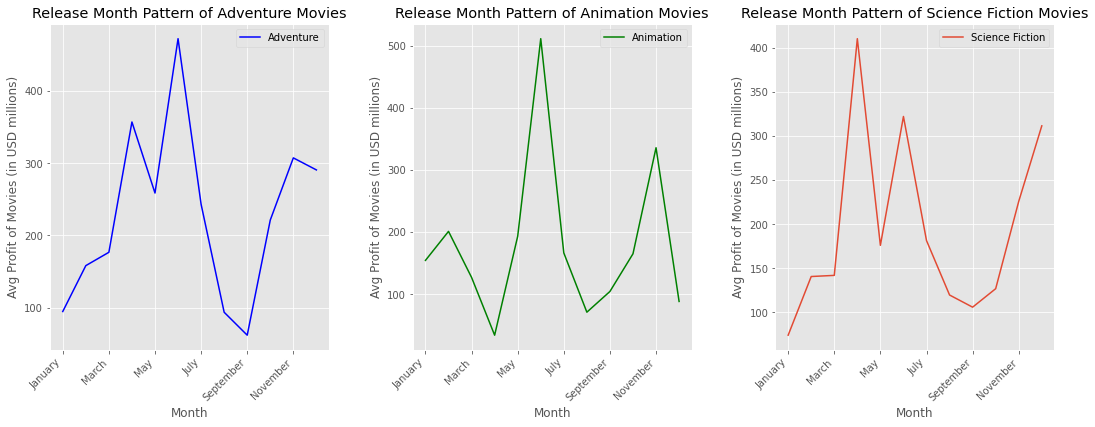

In [59]:
fig = plt.figure(figsize=(18,6))
fig.tight_layout()
fig.subplots_adjust(wspace=0.3)
ax7b = fig.add_subplot(131)
ax8b = fig.add_subplot(132)
ax9b = fig.add_subplot(133)

df_3g.plot(y='Adventure', kind='line', ax=ax7b, color='blue')
ax7b.set_title('Release Month Pattern of Adventure Movies')
ax7b.set_xlabel('Month')
ax7b.set_ylabel('Avg Profit of Movies (in USD millions)')
ax7b.set_xticklabels(ax7b.get_xticklabels(), rotation=45, ha='right')

df_3g.plot(y='Animation', kind='line', ax=ax8b, color='green')
ax8b.set_title('Release Month Pattern of Animation Movies')
ax8b.set_xlabel('Month')
ax8b.set_ylabel('Avg Profit of Movies (in USD millions)')
ax8b.set_xticklabels(ax8b.get_xticklabels(), rotation=45, ha='right')

df_3g.plot(y='Science Fiction', kind='line', ax=ax9b)
ax9b.set_title('Release Month Pattern of Science Fiction Movies')
ax9b.set_xlabel('Month')
ax9b.set_ylabel('Avg Profit of Movies (in USD millions)')
ax9b.set_xticklabels(ax9b.get_xticklabels(), rotation=45, ha='right');

Question 3 Recommendation:

According to our previous analysis, our studio shall produce the movies in genres of Adventure, Animation and Science Fiction. Therefore, from the highest average profit perspective, the best months to release these genres of movies should be:

- Adventure: April, June and November (summer and holiday season)
- Animation: Febuary, June and November (spring break, summer and holiday season)
- Science Fiction: April, June and December (summer and holiday season)


#### 4. Who are the top 5 directors and actors our studio should hire?

In [60]:
df_tmdb

,id,imdb_id,original_title,title,release_date,release_month,popularity,vote_average,vote_count,runtime,budget($mil),revenue($mil),score,profit($mil),genres
0,299534,tt4154796,Avengers: Endgame,Avengers: Endgame,2019-04-24,April,212.225,8.3,18313,181,356.0,2797.80,8.262640,2441.80,Adventure
0,299534,tt4154796,Avengers: Endgame,Avengers: Endgame,2019-04-24,April,212.225,8.3,18313,181,356.0,2797.80,8.262640,2441.80,Science Fiction
0,299534,tt4154796,Avengers: Endgame,Avengers: Endgame,2019-04-24,April,212.225,8.3,18313,181,356.0,2797.80,8.262640,2441.80,Action
1,140607,tt2488496,Star Wars: The Force Awakens,Star Wars: The Force Awakens,2015-12-15,December,45.699,7.3,15857,136,245.0,2068.22,7.280785,1823.22,Action
1,140607,tt2488496,Star Wars: The Force Awakens,Star Wars: The Force Awakens,2015-12-15,December,45.699,7.3,15857,136,245.0,2068.22,7.280785,1823.22,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,398978,tt1302006,The Irishman,The Irishman,2019-11-01,November,24.258,7.6,4715,209,159.0,8.00,7.516091,-151.00,Drama
2219,398978,tt1302006,The Irishman,The Irishman,2019-11-01,November,24.258,7.6,4715,209,159.0,8.00,7.516091,-151.00,History
2220,57201,tt1210819,The Lone Ranger,The Lone Ranger,2013-07-03,July,24.113,6.0,4750,149,255.0,89.29,6.037056,-165.71,Action
2220,57201,tt1210819,The Lone Ranger,The Lone Ranger,2013-07-03,July,24.113,6.0,4750,149,255.0,89.29,6.037056,-165.71,Adventure


In [61]:
df_imdb = df_imdb[['tconst','nconst','category', 'primary_name']]

In [62]:
df_imdb_crew = df_imdb[(df_imdb.category == 'director') | (df_imdb.category == 'actor')]

In [63]:
df_imdb_crew

,tconst,nconst,category,primary_name
1,tt0063540,nm0474801,actor,Dilip Kumar
3,tt0063540,nm0756379,actor,Balraj Sahni
4,tt0063540,nm0474876,actor,Sanjeev Kumar
5,tt0063540,nm0712540,director,Harnam Singh Rawail
22,tt0066787,nm0451809,actor,Arun Khopkar
...,...,...,...,...
629588,tt9914286,nm10569025,actor,Burhan Sirmabiyik
629592,tt9914942,nm1290838,actor,Isaac Alcayde
629593,tt9914942,nm7817936,actor,Pau Escobar
629594,tt9914942,nm1716653,director,Laura Jou


In [64]:
df_4 = pd.merge(df_tmdb, df_imdb_crew.rename(columns={'tconst': 'imdb_id'}), on='imdb_id', how='left')

In [65]:
df_4d_ad = df_4[(df_4.category == 'director') & (df_4.genres == 'Adventure')]
df_4a_ad = df_4[(df_4.category == 'actor') & (df_4.genres == 'Adventure')]
df_4d_an = df_4[(df_4.category == 'director') & (df_4.genres == 'Animation')]
df_4a_an = df_4[(df_4.category == 'actor') & (df_4.genres == 'Animation')]
df_4d_sf = df_4[(df_4.category == 'director') & (df_4.genres == 'Science Fiction')]
df_4a_sf = df_4[(df_4.category == 'actor') & (df_4.genres == 'Science Fiction')]

In [66]:
df_dad = pd.DataFrame(df_4d_ad.groupby('primary_name')['profit($mil)'].mean().sort_values(ascending=False).head(5))
df_dan = pd.DataFrame(df_4d_an.groupby('primary_name')['profit($mil)'].mean().sort_values(ascending=False).head(5))
df_dsf = pd.DataFrame(df_4d_sf.groupby('primary_name')['profit($mil)'].mean().sort_values(ascending=False).head(5))

In [67]:
sns.set_context('notebook')

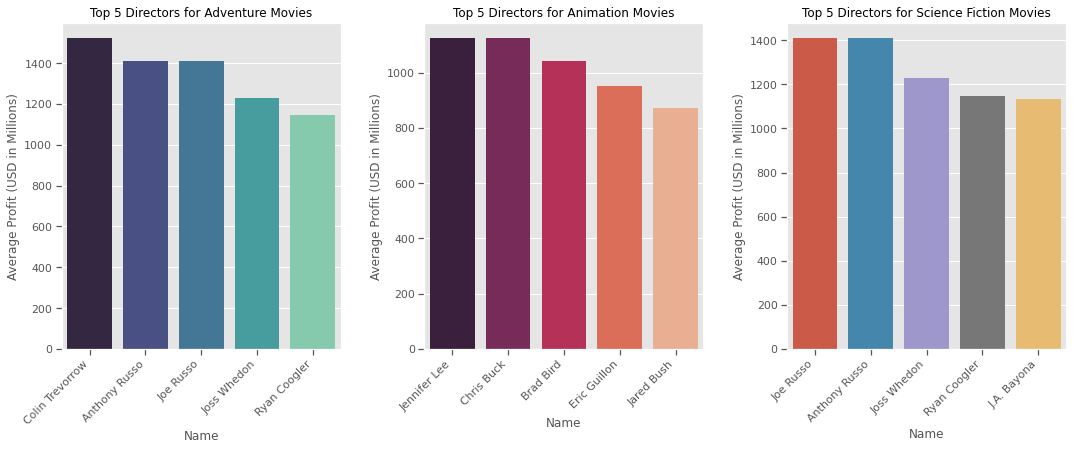

In [68]:
fig = plt.figure(figsize=(18,6))
fig.tight_layout()
fig.subplots_adjust(wspace=0.3)
ax10 = fig.add_subplot(131)
ax11 = fig.add_subplot(132)
ax12 = fig.add_subplot(133)

sns.barplot(df_dad.index, df_dad['profit($mil)'], palette='mako', ax=ax10)
ax10.set_title('Top 5 Directors for Adventure Movies')
ax10.set_ylabel('Average Profit (USD in Millions)')
ax10.set_xlabel('Name')
ax10.set_xticklabels(ax10.get_xticklabels(), rotation=45, ha='right')

sns.barplot(df_dan.index, df_dan['profit($mil)'], palette='rocket', ax=ax11)
ax11.set_title('Top 5 Directors for Animation Movies')
ax11.set_ylabel('Average Profit (USD in Millions)')
ax11.set_xlabel('Name')
ax11.set_xticklabels(ax11.get_xticklabels(), rotation=45, ha='right')

sns.barplot(df_dsf.index, df_dsf['profit($mil)'], ax=ax12)
ax12.set_title('Top 5 Directors for Science Fiction Movies')
ax12.set_ylabel('Average Profit (USD in Millions)')
ax12.set_xlabel('Name')
ax12.set_xticklabels(ax12.get_xticklabels(), rotation=45, ha='right');

In [69]:
# sanity check to see how many movies directed by each top director. 
list1 = df_dad.index.tolist()
list2 = df_dan.index.tolist()
list3 = df_dsf.index.tolist()
list4 = list1 + list2 + list3

In [70]:
top_director_list = list(set(list4))

In [71]:
df_4check1 = df_4.groupby(['primary_name', 'genres'])['imdb_id'].count().unstack()
df_4check2 = df_4check1[['Adventure', 'Animation', 'Science Fiction']].fillna(0).astype(int)
df_4check2.loc[top_director_list]

genres,Adventure,Animation,Science Fiction
primary_name,,,
Joe Russo,4,0,4
Jennifer Lee,1,1,0
Ryan Coogler,1,0,1
Chris Buck,1,1,0
Jared Bush,1,1,0
Joss Whedon,2,0,2
Colin Trevorrow,1,0,2
Eric Guillon,1,1,0
Anthony Russo,4,0,4


In [72]:
dict_movie1 = {}

for i, x in enumerate(top_director_list):
    dict_movie1.update({x: list(set(df_4.original_title[df_4.primary_name == x]))})
    
dict_movie1

{'Joe Russo': ['Avengers: Infinity War',
  'Captain America: Civil War',
  'Captain America: The Winter Soldier',
  'Avengers: Endgame'],
 'Jennifer Lee': ['Frozen'],
 'Ryan Coogler': ['Fruitvale Station', 'Creed', 'Black Panther'],
 'Chris Buck': ['Frozen'],
 'Jared Bush': ['Zootopia'],
 'Joss Whedon': ['The Avengers', 'Avengers: Age of Ultron'],
 'Colin Trevorrow': ['The Book of Henry',
  'Jurassic World',
  'Safety Not Guaranteed'],
 'Eric Guillon': ['Despicable Me 3'],
 'Anthony Russo': ['Avengers: Infinity War',
  'Captain America: Civil War',
  'Captain America: The Winter Soldier',
  'Avengers: Endgame'],
 'J.A. Bayona': ['Jurassic World: Fallen Kingdom',
  'A Monster Calls',
  'The Impossible'],
 'Brad Bird': ['Tomorrowland',
  'Mission: Impossible - Ghost Protocol',
  'Incredibles 2']}

In [73]:
df_top_dm = pd.DataFrame(dict_movie1.items(), columns=['director', 'movie_title'])

In [74]:
df_top_dm['movie_title'] = df_top_dm['movie_title'].apply(lambda x: ', '.join(x))

In [75]:
pd.set_option('display.max_colwidth', None)
df_top_dm

,director,movie_title
0,Joe Russo,"Avengers: Infinity War, Captain America: Civil War, Captain America: The Winter Soldier, Avengers: Endgame"
1,Jennifer Lee,Frozen
2,Ryan Coogler,"Fruitvale Station, Creed, Black Panther"
3,Chris Buck,Frozen
4,Jared Bush,Zootopia
5,Joss Whedon,"The Avengers, Avengers: Age of Ultron"
6,Colin Trevorrow,"The Book of Henry, Jurassic World, Safety Not Guaranteed"
7,Eric Guillon,Despicable Me 3
8,Anthony Russo,"Avengers: Infinity War, Captain America: Civil War, Captain America: The Winter Soldier, Avengers: Endgame"
9,J.A. Bayona,"Jurassic World: Fallen Kingdom, A Monster Calls, The Impossible"


Sanity Check1 - Findings: 

The top directors are the ones who directed those big IP / series movies. Though some directors only had one movie in review period, they created most profits. They will contiue being popular and will direct other sequels of the big IP movies. Therefore, to some extent, the top director list is still representative. 

In [76]:
df_aad = pd.DataFrame(df_4a_ad.groupby('primary_name')['profit($mil)'].mean().sort_values(ascending=False).head(5))
df_aan = pd.DataFrame(df_4a_an.groupby('primary_name')['profit($mil)'].mean().sort_values(ascending=False).head(5))
df_asf = pd.DataFrame(df_4a_sf.groupby('primary_name')['profit($mil)'].mean().sort_values(ascending=False).head(5))

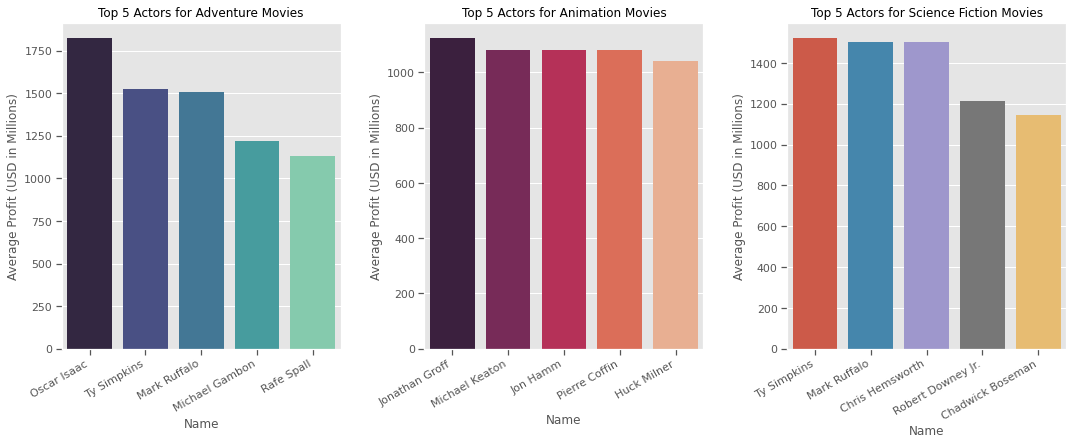

In [77]:
fig = plt.figure(figsize=(18,6))
fig.tight_layout()
fig.subplots_adjust(wspace=0.3)
ax13 = fig.add_subplot(131)
ax14 = fig.add_subplot(132)
ax15 = fig.add_subplot(133)

sns.barplot(df_aad.index, df_aad['profit($mil)'], palette='mako', ax=ax13)
ax13.set_title('Top 5 Actors for Adventure Movies')
ax13.set_ylabel('Average Profit (USD in Millions)')
ax13.set_xlabel('Name')
ax13.set_xticklabels(ax13.get_xticklabels(), rotation=30, ha='right')

sns.barplot(df_aan.index, df_aan['profit($mil)'], palette='rocket', ax=ax14)
ax14.set_title('Top 5 Actors for Animation Movies')
ax14.set_ylabel('Average Profit (USD in Millions)')
ax14.set_xlabel('Name')
ax14.set_xticklabels(ax14.get_xticklabels(), rotation=30, ha='right')

sns.barplot(df_asf.index, df_asf['profit($mil)'], ax=ax15)
ax15.set_title('Top 5 Actors for Science Fiction Movies')
ax15.set_ylabel('Average Profit (USD in Millions)')
ax15.set_xlabel('Name')
ax15.set_xticklabels(ax15.get_xticklabels(), rotation=30, ha='right');

In [78]:
# sanity check to see how many movies played by each top actors. 
list5 = df_aad.index.tolist()
list6 = df_aan.index.tolist()
list7 = df_asf.index.tolist()
list8 = list5 + list6 + list7
top_actor_list = list(set(list8))
top_actor_list

['Chris Hemsworth',
 'Chadwick Boseman',
 'Jon Hamm',
 'Michael Keaton',
 'Huck Milner',
 'Michael Gambon',
 'Mark Ruffalo',
 'Rafe Spall',
 'Ty Simpkins',
 'Robert Downey Jr.',
 'Jonathan Groff',
 'Pierre Coffin',
 'Oscar Isaac']

In [79]:
df_4check3 = df_4.groupby(['primary_name', 'genres'])['imdb_id'].count().unstack()
df_4check4 = df_4check3[['Adventure', 'Animation', 'Science Fiction']].fillna(0).astype(int)
df_4check4.loc[top_actor_list]

genres,Adventure,Animation,Science Fiction
primary_name,,,
Chris Hemsworth,9,0,4
Chadwick Boseman,2,0,1
Jon Hamm,1,1,0
Michael Keaton,3,1,2
Huck Milner,1,1,0
Michael Gambon,1,0,0
Mark Ruffalo,4,0,4
Rafe Spall,1,0,1
Ty Simpkins,1,0,1


In [80]:
dict_movie2 = {}

for i, x in enumerate(top_actor_list):
    dict_movie2.update({x: list(set(df_4.original_title[df_4.primary_name == x]))})
    
dict_movie2

{'Chris Hemsworth': ['Snow White and the Huntsman',
  'Red Dawn',
  'Ca$h',
  'Thor: Ragnarok',
  'Rush',
  'Avengers: Infinity War',
  'Avengers: Endgame',
  'The Cabin in the Woods',
  '12 Strong',
  'Avengers: Age of Ultron',
  'Thor: The Dark World',
  "The Huntsman: Winter's War",
  'Blackhat',
  'In the Heart of the Sea',
  'Thor'],
 'Chadwick Boseman': ['Marshall',
  'Draft Day',
  'Black Panther',
  '42',
  'Gods of Egypt',
  'Get on Up'],
 'Jon Hamm': ['Minions',
  'Keeping Up with the Joneses',
  'The Town',
  'Baby Driver',
  'Tag',
  'Bad Times at the El Royale',
  'Million Dollar Arm'],
 'Michael Keaton': ['The Founder',
  'Spider-Man: Homecoming',
  'Birdman or (The Unexpected Virtue of Ignorance)',
  'Minions',
  'Dumbo',
  'American Assassin',
  'RoboCop',
  'Spotlight'],
 'Huck Milner': ['Incredibles 2'],
 'Michael Gambon': ['Harry Potter and the Deathly Hallows: Part 2', 'Quartet'],
 'Mark Ruffalo': ['The Kids Are All Right',
  'Begin Again',
  'Thor: Ragnarok',
  'Sh

In [81]:
df_top_am = pd.DataFrame(dict_movie2.items(), columns=['actor', 'movie_title'])

In [82]:
df_top_am['movie_title'] = df_top_am['movie_title'].apply(lambda x: ', '.join(x))

In [83]:
pd.set_option('display.max_colwidth', None)
df_top_am

,actor,movie_title
0,Chris Hemsworth,"Snow White and the Huntsman, Red Dawn, Ca$h, Thor: Ragnarok, Rush, Avengers: Infinity War, Avengers: Endgame, The Cabin in the Woods, 12 Strong, Avengers: Age of Ultron, Thor: The Dark World, The Huntsman: Winter's War, Blackhat, In the Heart of the Sea, Thor"
1,Chadwick Boseman,"Marshall, Draft Day, Black Panther, 42, Gods of Egypt, Get on Up"
2,Jon Hamm,"Minions, Keeping Up with the Joneses, The Town, Baby Driver, Tag, Bad Times at the El Royale, Million Dollar Arm"
3,Michael Keaton,"The Founder, Spider-Man: Homecoming, Birdman or (The Unexpected Virtue of Ignorance), Minions, Dumbo, American Assassin, RoboCop, Spotlight"
4,Huck Milner,Incredibles 2
5,Michael Gambon,"Harry Potter and the Deathly Hallows: Part 2, Quartet"
6,Mark Ruffalo,"The Kids Are All Right, Begin Again, Thor: Ragnarok, Shutter Island, Avengers: Infinity War, Avengers: Endgame, Margaret, Foxcatcher, Avengers: Age of Ultron, Now You See Me 2, Now You See Me, Infinitely Polar Bear, Spotlight"
7,Rafe Spall,"Jurassic World: Fallen Kingdom, The Ritual"
8,Ty Simpkins,"Jurassic World, Insidious"
9,Robert Downey Jr.,"Iron Man 2, Spider-Man: Homecoming, Iron Man 3, The Judge, The Avengers, Captain America: Civil War, Avengers: Infinity War, Avengers: Endgame, Avengers: Age of Ultron, Sherlock Holmes: A Game of Shadows, Due Date, Chef"


Sanity Check2 - Findings: 

The top actors are the ones who are the leading actors of the big IP / series movies, but they played roles in more than one ore two movies. The top actor list is more representative than the top director list. Though we noticed Jonathan Groff and Huck Milneronly acted in single movies, Frozen and Incredible are big IP movie series and will have sequels. However, we should take into considertation whether the actor is still active in the movie industry.

Question 4 Recommendation:

The graphs above list out the Top 5 Directors and Actors who will bring highest profits for Adventure, Amination and Science Fiction Movies respectively.

## Summary

### Recommendation

The new studio that Microsoft will launch shall produce the movies in genres of Adventure, Animation and Science Fiction from the profitability and popularity perspective. 


The best months to release these genres of movies should be:

- Adventure: April, June and November
- Animation: Febuary, June and November
- Science Fiction: April, June and December


The Top 5 directors and actors that we shall hire are:

- Adventure: 
    - Directors: Colin Trevorrow, Anthony Russo, Joe Russo, Joss Whedon, and Ryan Coogler
    - Actors: Oscar Isaac, Ty Simpkins, Mark Ruffalo, Michael Gambon, and Rafe Spall
    
- Animation: 
    - Directors: Jennifer Lee, Chris Buck, Brad Bird, Eric Guillon, and Jared Bush
    - Actors: Jonathan Groff, Michael Keaton, Jon Hamm, Pierre Coffin, and Huck Milner
    
- Science Fiction:
    - Directors: Joe Russo, Anthony Russo, Joss Whedon, Ryan Coogler, and J.A. Bayona
    - Actors: Ty Simpkins, Mark Ruffalo, Chris Hemsworth, Robert Downey Jr., and Chadwick Boseman (died in 2020).

### Next Step

The analysis is based on the movie data on TMDb and IMDb for the period between 2010 and 2019 (i.e. pre-pandemic). However, the pandemic has changed the movie industry and especially the movie viewing habits of audience. 

1. Data source:
As an alternative to the theater, people tend to view videos via social media and over-the-top media service (i.e. OTT service, such as Netflix, Hulu, Amazon Prime and etc). Therefore, our data sources should be expanded and cover more channels instead of theater box office numbers alone. 

2. Movie genres:
Pandemics may have changed people's appetite to the genres of movies. Parents may spend more time with their kids to watch Animation, Family and History movies, while young people staying at home may prefer Action, Thriller and Horror movies to get excitement. We may reconsider which genre of movies is making more profits or getting more popular. Accordingly, we need to reevaluate the crew (including directors and actors) to hire.

3. Release time:
As people tend to watch movies via OTT service, the release time may be more flexible. 

4. Big IP/Series movies:
On the other hand, the profits and top crews are largely determined by big IP movies. As a new studio, we should take the impact of big IPs into consideration. 